In [63]:
# Importing libraries and packages required for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from statsmodels.stats.weightstats import ztest
from scipy.stats import linregress


In [64]:
# Pandas and Seaborn options
pd.set_option('display.float_format', '{:0.4f}'.format)
sns.set_style('whitegrid')
sns.set_palette('muted')

In [65]:
df = pd.read_csv(r"C:\Users\santh\Downloads\Retail Analytics Dataset.csv")
print(df.shape)
df.head()

(9994, 11)


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.1200,401.2800,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.1800,149.8000,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.2100,165.2000,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.2500,89.6000,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.2600,918.4500,Tamil Nadu


In [66]:
df.describe()

,Sales,Discount,Profit
count,9994.0000,9994.0000,9994.0000
mean,1496.5962,0.2268,374.9371
std,577.5590,0.0746,239.9329
min,500.0000,0.1000,25.2500
25%,1000.0000,0.1600,180.0225
50%,1498.0000,0.2300,320.7800
75%,1994.7500,0.2900,525.6275
max,2500.0000,0.3500,1120.9500


In [67]:
rename_dict = {'Order ID':'order_id',
               'Customer Name':'customer_name',
               'Category':'category',
               'Sub Category':'sub_category',
               'City':'city',
               'Order Date':'order_date',
               'Region':'region',
               'Sales':'sale_price',
               'Discount':'discount',
               'Profit':'profit',
               'State':'state'
              }

df = df.rename(columns=rename_dict).copy()

In [68]:
for col in df.columns:
    print(col + ' has the datatype: \t',  df[col].dtype)

order_id has the datatype: 	 object
customer_name has the datatype: 	 object
category has the datatype: 	 object
sub_category has the datatype: 	 object
city has the datatype: 	 object
order_date has the datatype: 	 object
region has the datatype: 	 object
sale_price has the datatype: 	 int64
discount has the datatype: 	 float64
profit has the datatype: 	 float64
state has the datatype: 	 object


In [69]:
# Converting order_date to datetime datatype
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
# Extracting year and month using dt.year and dt.month accessors
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month

In [70]:
#Check for missing values
df.isna().all()

order_id         False
customer_name    False
category         False
sub_category     False
city             False
order_date       False
region           False
sale_price       False
discount         False
profit           False
state            False
year             False
month            False
dtype: bool

In [71]:
#Checking duplicate rows
df.duplicated().sum()

0

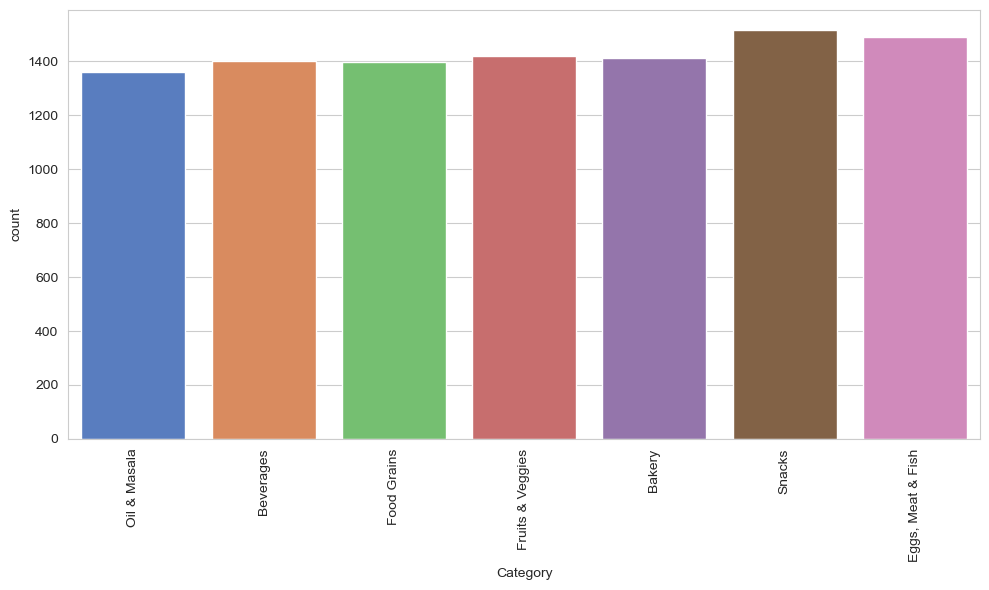

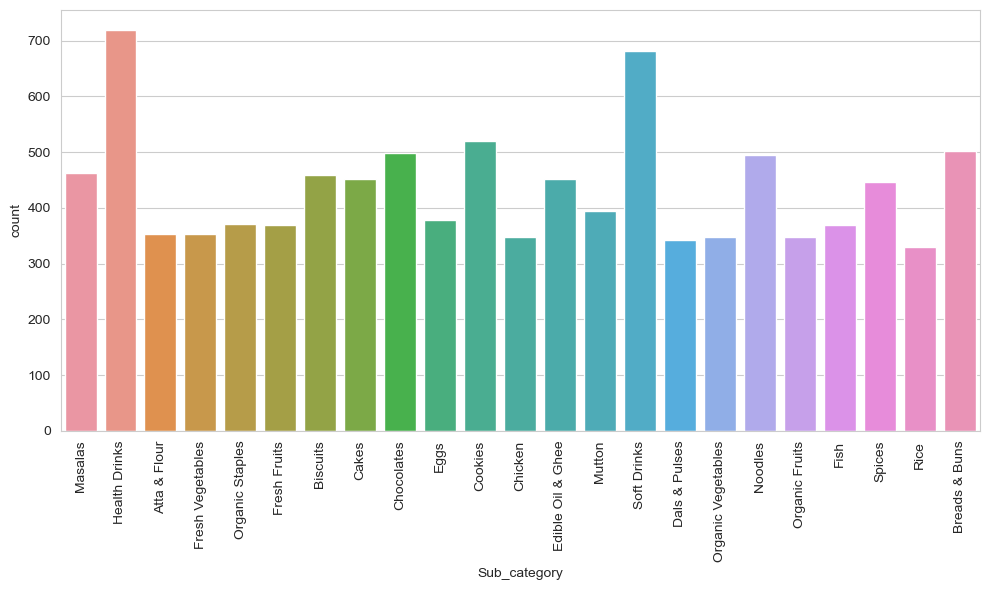

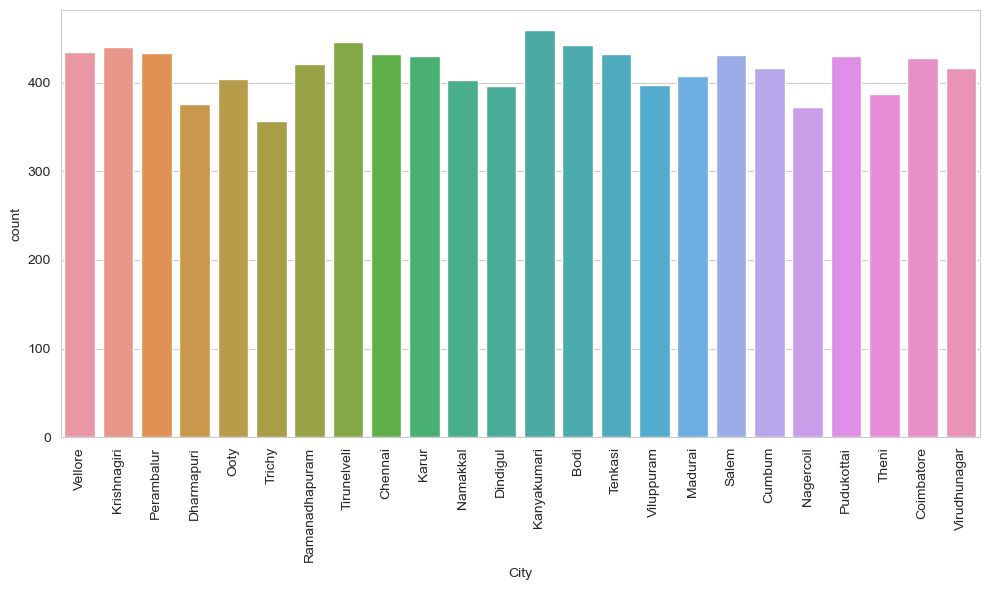

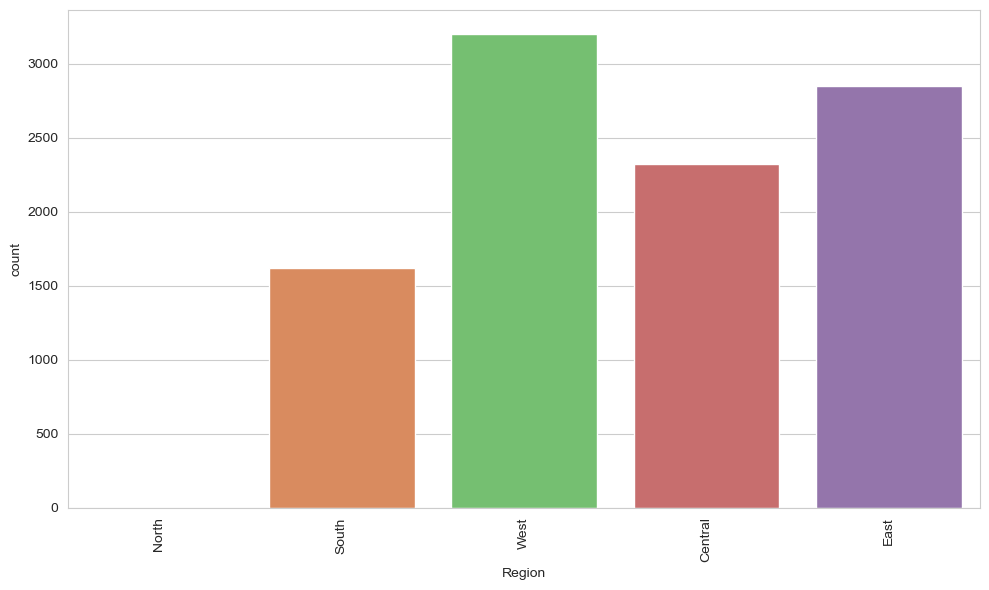

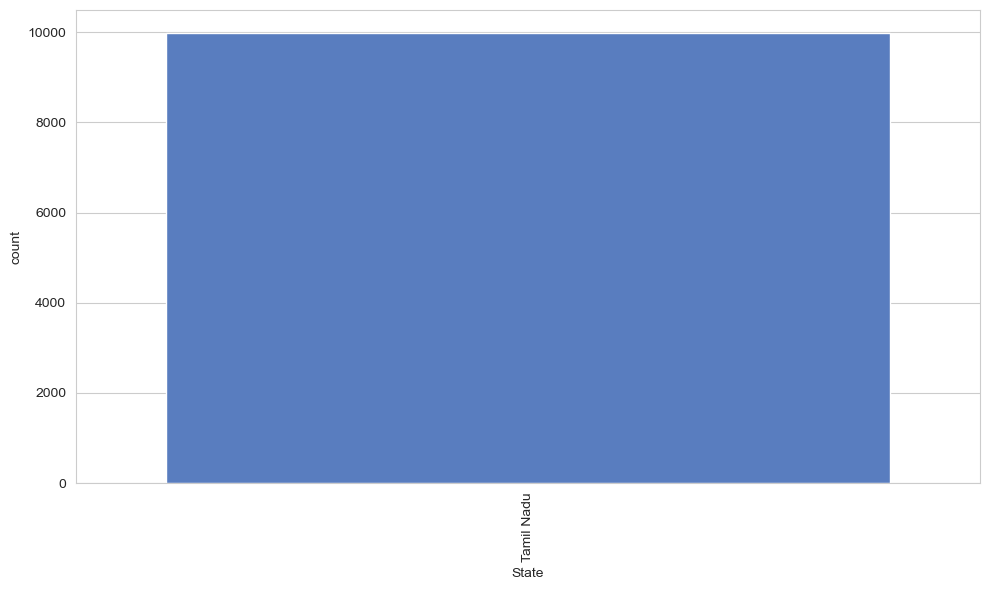

In [72]:
categorical_columns = ['category','sub_category','city','region', 'state']
def plot_all_hist(df, columns):
    for col in columns:
        plt.figure(figsize=(10,6))
        sns.countplot(x=col, data=df)
        plt.xlabel(col.capitalize())
        plt.xticks(rotation='vertical')
        plt.tight_layout()
        plt.show()

plot_all_hist(df, categorical_columns)

In [31]:
df.region.value_counts()

region
West       3203
East       2848
Central    2323
South      1619
North         1
Name: count, dtype: int64

In [73]:
# Removing the state column
sgs = df.drop(columns=['state']).copy()

# Removing the row of data that contains region == North
index_to_remove = sgs[sgs.region == 'North'].index.values
sgs = sgs.drop(index = index_to_remove).copy()
# Vallidating that the "North" entry has been removed

print(sgs.columns)
print("")
print(sgs.region.value_counts())

Index(['order_id', 'customer_name', 'category', 'sub_category', 'city',
       'order_date', 'region', 'sale_price', 'discount', 'profit', 'year',
       'month'],
      dtype='object')

region
West       3203
East       2848
Central    2323
South      1619
Name: count, dtype: int64


In [74]:
#Checking numerical column anomalies
numerical_cols = ['sale_price','discount','profit']
sgs[numerical_cols].describe()

,sale_price,discount,profit
count,9993.0000,9993.0000,9993.0000
mean,1496.6204,0.2268,374.9344
std,577.5828,0.0746,239.9447
min,500.0000,0.1000,25.2500
25%,1000.0000,0.1600,180.0000
50%,1498.0000,0.2300,320.7600
75%,1995.0000,0.2900,525.6900
max,2500.0000,0.3500,1120.9500


In [75]:
#To calculate original price and discount price
sgs['original_price'] = sgs['sale_price']/(1- sgs['discount'])
sgs['discount_amount'] = sgs['original_price'] - sgs['sale_price']
sgs.head()

,order_id,customer_name,category,sub_category,city,order_date,region,sale_price,discount,profit,year,month,original_price,discount_amount
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.1800,149.8000,2017.0000,11.0000,913.4146,164.4146
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.2100,165.2000,2017.0000,6.0000,2987.3418,627.3418
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.2500,89.6000,2016.0000,10.0000,1194.6667,298.6667
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.2600,918.4500,2016.0000,10.0000,3182.4324,827.4324
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,2015-06-09,West,2305,0.2600,322.7000,2015.0000,6.0000,3114.8649,809.8649


The stats for sale_price are as follows:
       sale_price    profit  discount_amount
count   9993.0000 9993.0000        9993.0000
mean    1496.6204  374.9344         456.8789
std      577.5828  239.9447         268.2104
min      500.0000   25.2500          55.6667
25%     1000.0000  180.0000         246.1395
50%     1498.0000  320.7600         398.2963
75%     1995.0000  525.6900         619.1026
max     2500.0000 1120.9500        1345.6154

The histogram for sale_price is shown below:


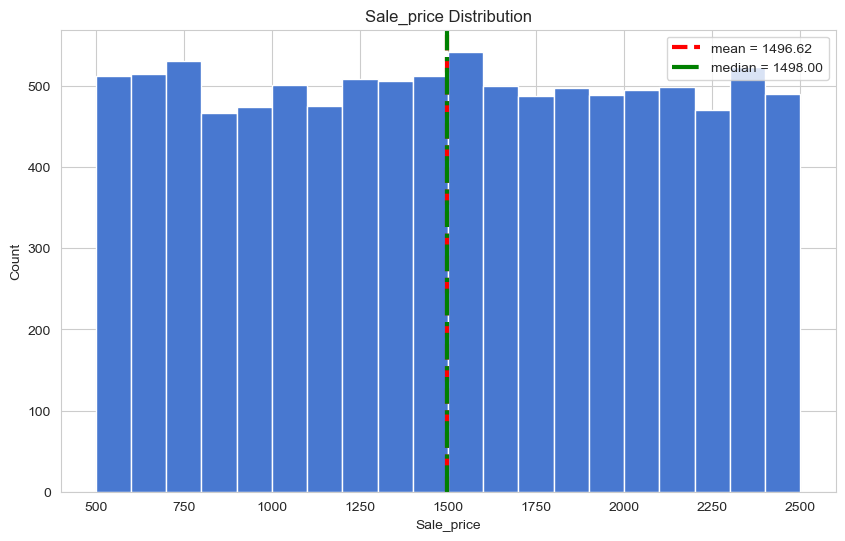


The stats for profit are as follows:
       sale_price    profit  discount_amount
count   9993.0000 9993.0000        9993.0000
mean    1496.6204  374.9344         456.8789
std      577.5828  239.9447         268.2104
min      500.0000   25.2500          55.6667
25%     1000.0000  180.0000         246.1395
50%     1498.0000  320.7600         398.2963
75%     1995.0000  525.6900         619.1026
max     2500.0000 1120.9500        1345.6154

The histogram for profit is shown below:


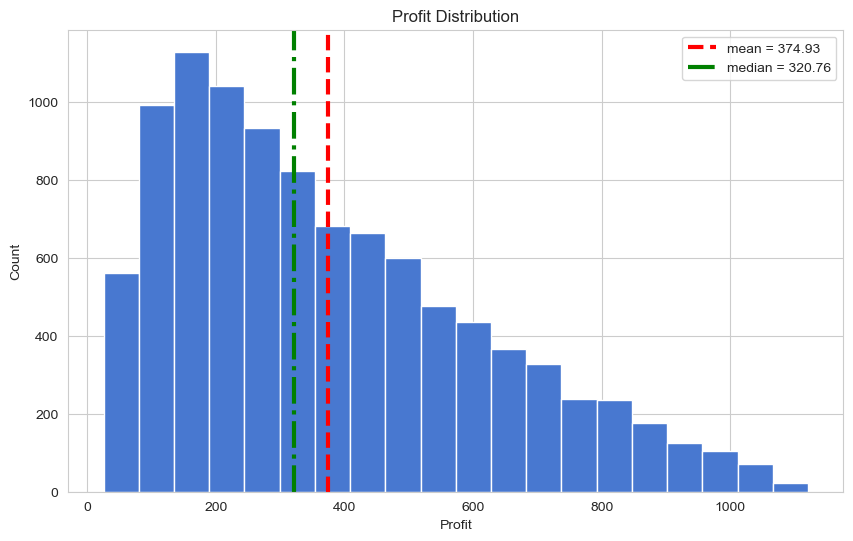


The stats for discount_amount are as follows:
       sale_price    profit  discount_amount
count   9993.0000 9993.0000        9993.0000
mean    1496.6204  374.9344         456.8789
std      577.5828  239.9447         268.2104
min      500.0000   25.2500          55.6667
25%     1000.0000  180.0000         246.1395
50%     1498.0000  320.7600         398.2963
75%     1995.0000  525.6900         619.1026
max     2500.0000 1120.9500        1345.6154

The histogram for discount_amount is shown below:


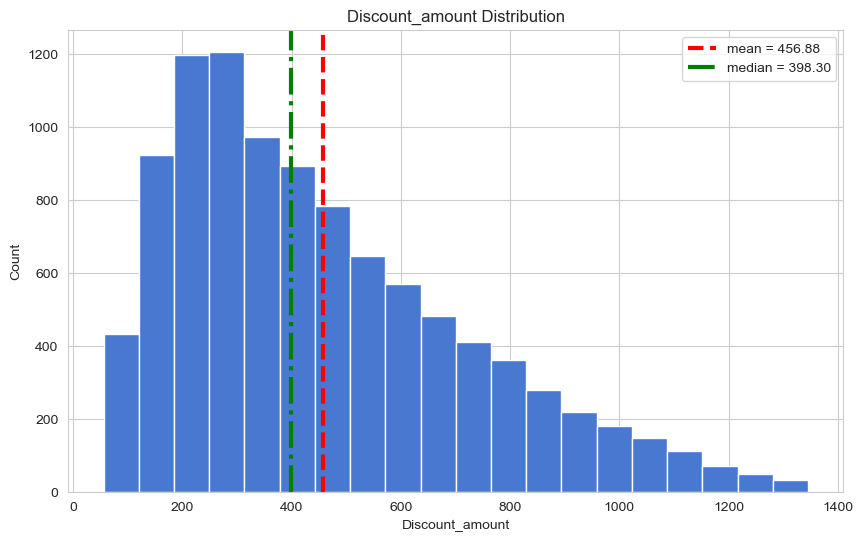

In [76]:
#Sale Price, Profit and Discount amount distribution
def plot_num_histogram(columns):
    for col in columns:  
        print(f'The stats for {col} are as follows:')
        print(sgs[columns].describe())
        print("")
        print(f'The histogram for {col} is shown below:')
        plt.figure(figsize=(10,6))
        plt.hist(sgs[col], bins=20)
        plt.title(col.capitalize() + " Distribution")
        plt.xlabel(col.capitalize())
        plt.ylabel('Count')
        plt.axvline(sgs[col].mean(), color='red', linestyle='dashed', linewidth=3, label='mean = ' + "{:.2f}".format(sgs[col].mean()))
        plt.axvline(sgs[col].median(), color='green', linestyle='dashdot', linewidth=3, label='median = '+ "{:.2f}".format(sgs[col].median()))
        plt.legend()
        plt.show()
        print('')
        
plot_num_histogram(['sale_price', 'profit', 'discount_amount'])

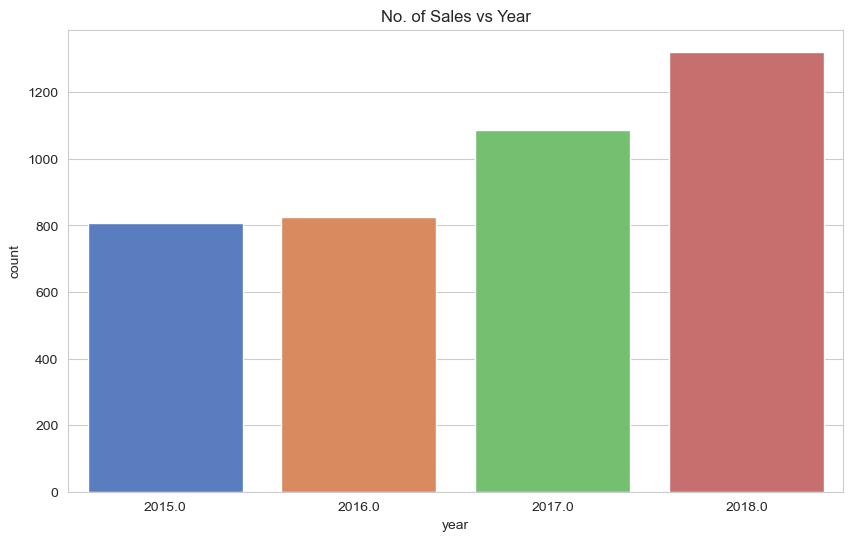

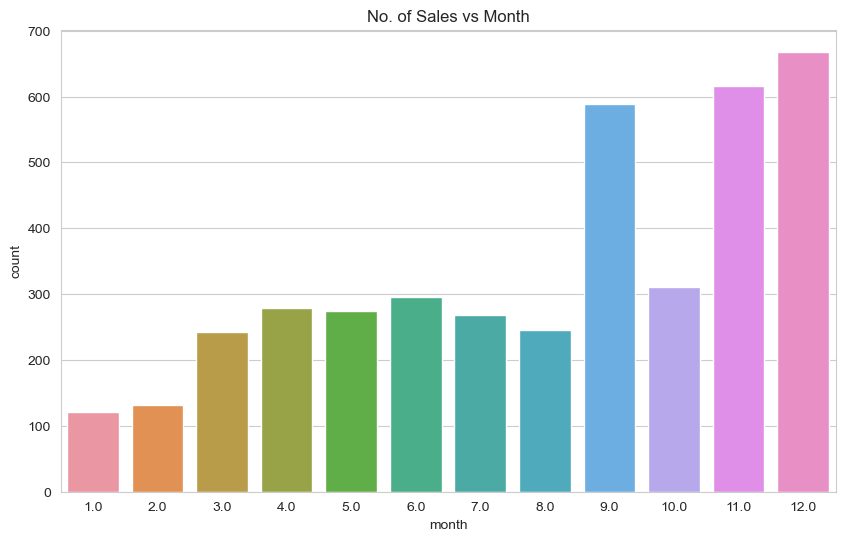

In [77]:
#Sales amount and Sale count by year and month¶
plt.figure(figsize=(10,6))
sns.countplot(data=sgs, x='year')
plt.title('No. of Sales vs Year')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(data=sgs, x='month')
plt.title('No. of Sales vs Month')
plt.show()

C:\Users\santh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\santh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\santh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\santh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

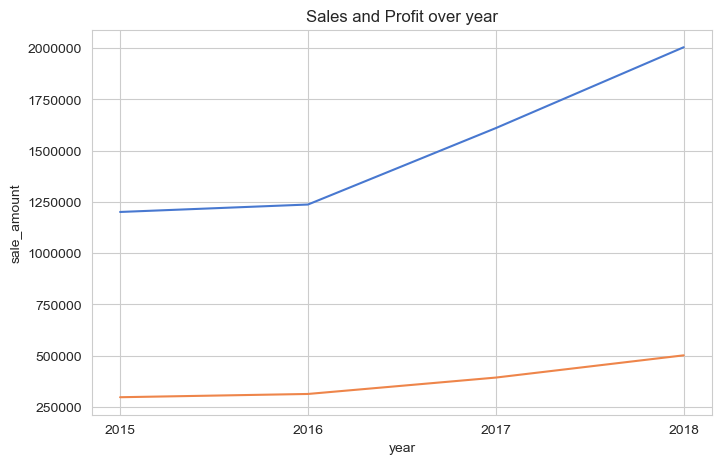

In [78]:
# sales amount and profit over time.

sgs_grouped_by_year = sgs.groupby('year', as_index=False).agg(sale_amount = pd.NamedAgg(column='sale_price', aggfunc='sum'),
                                                             profit_amount = pd.NamedAgg(column='profit', aggfunc='sum'))
sgs_grouped_by_month = sgs.groupby('month', as_index=False).agg(sale_amount = pd.NamedAgg(column='sale_price', aggfunc='sum'),
                                                               profit_amount = pd.NamedAgg(column='profit', aggfunc='sum'))
plt.figure(figsize=(8,5))
sns.lineplot(data=sgs_grouped_by_year, x='year', y='sale_amount')
sns.lineplot(data=sgs_grouped_by_year, x='year', y='profit_amount')
plt.xticks(ticks=[2015,2016,2017,2018])
plt.ticklabel_format(style='plain')
plt.title('Sales and Profit over year')
plt.show()

C:\Users\santh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\santh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\santh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\santh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

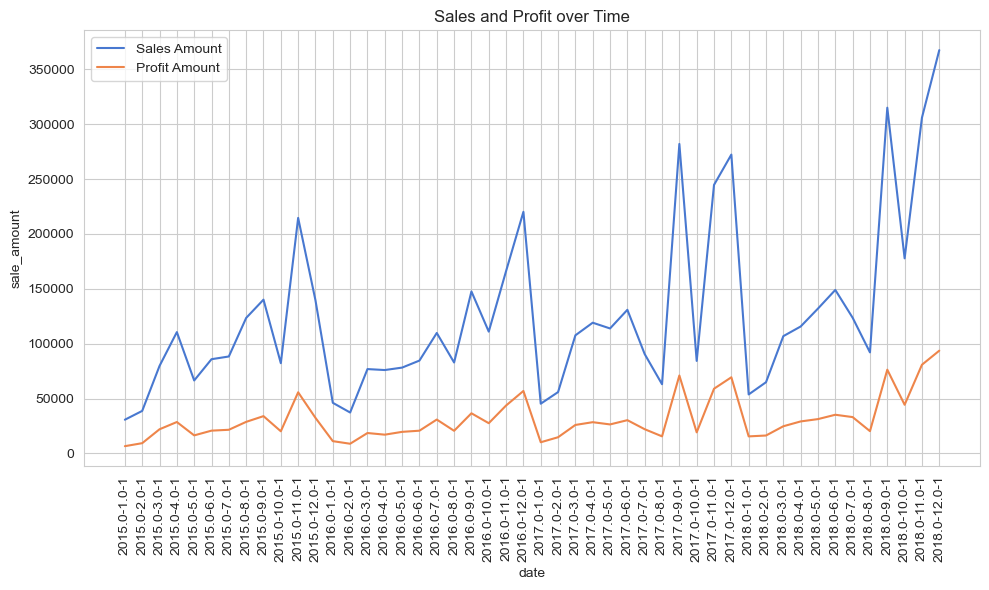

In [79]:
# plotting it in terms of months.

sgs_grouped_by_YM = sgs.groupby(['year','month'], as_index=False).agg(sale_amount = pd.NamedAgg(column='sale_price', aggfunc='sum'),
                                                               profit_amount = pd.NamedAgg(column='profit', aggfunc='sum'),
                                                                     sale_count = pd.NamedAgg(column='profit', aggfunc='count'))

sgs_grouped_by_YM['date'] = np.array(sgs_grouped_by_YM['year'].astype('str') +'-'+ sgs_grouped_by_YM ['month'].astype('str') + '-1', dtype=datetime.date)
plt.figure(figsize=(10,6))
sns.lineplot(data=sgs_grouped_by_YM, x='date', y='sale_amount', label='Sales Amount')
sns.lineplot(data=sgs_grouped_by_YM, x='date', y='profit_amount', label='Profit Amount')
# sns.lineplot(data=sgs_grouped_by_YM, x='date', y='sale_count', label='Sale Count')

plt.legend()
# plt.xticks(ticks=[2015,2016,2017,2018])
plt.xticks(rotation=90)
plt.title('Sales and Profit over Time')
plt.tight_layout()
plt.show()

C:\Users\santh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\santh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\santh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\santh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

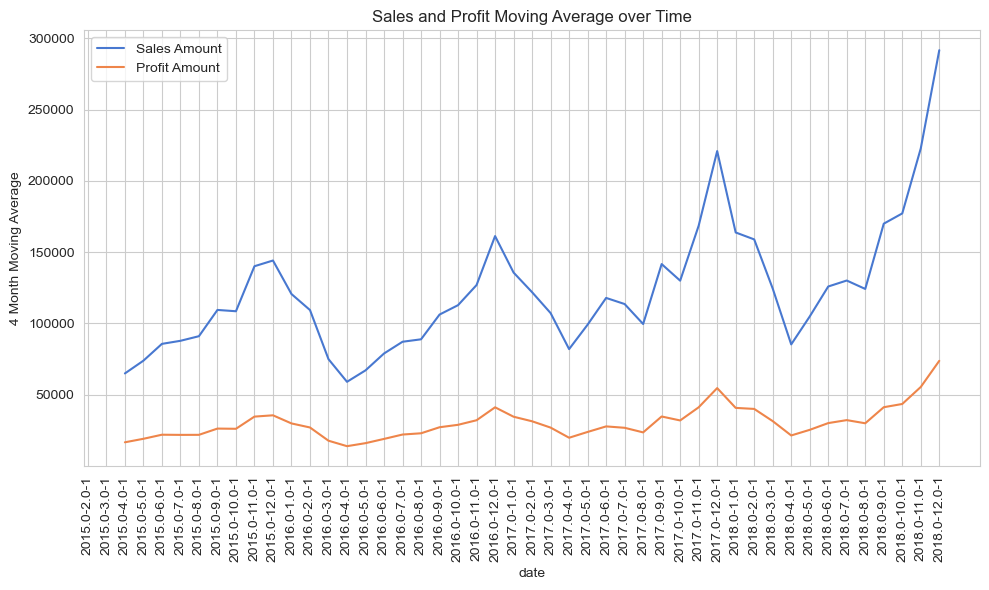

In [80]:
# Plotting using 4 month - Moving Average 
sgs_grouped_by_YM['sale_MA'] = sgs_grouped_by_YM['sale_amount'].rolling(4).mean()
sgs_grouped_by_YM['profit_MA'] = sgs_grouped_by_YM['profit_amount'].rolling(4).mean()

# Plotting
plt.figure(figsize=(10,6))
sns.lineplot(data=sgs_grouped_by_YM, x='date', y='sale_MA', label='Sales Amount')
sns.lineplot(data=sgs_grouped_by_YM, x='date', y='profit_MA', label='Profit Amount')
plt.legend()
plt.xticks(rotation=90)
plt.ylabel('4 Month Moving Average')
plt.title('Sales and Profit Moving Average over Time')
plt.tight_layout()
plt.show()


<Axes: >

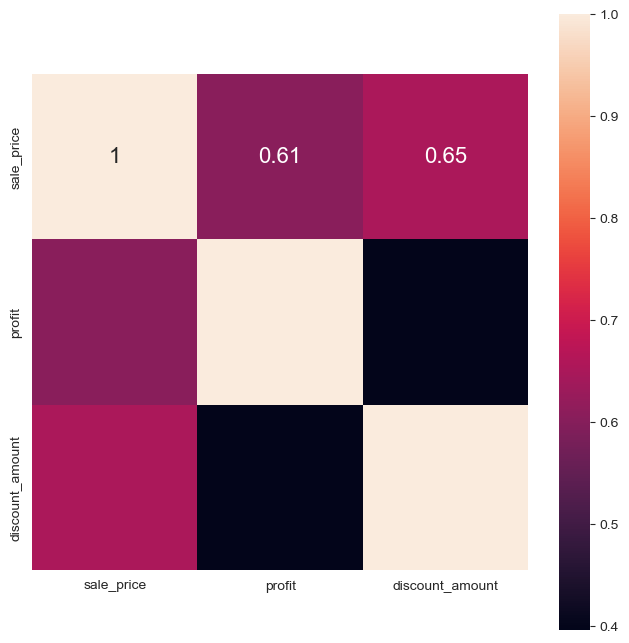

In [81]:
#finding correlation using heatmap
plt.figure(figsize=(8,8))
sns.heatmap(sgs[['sale_price','profit','discount_amount']].corr(), square=True, annot=True, annot_kws={"size":16})

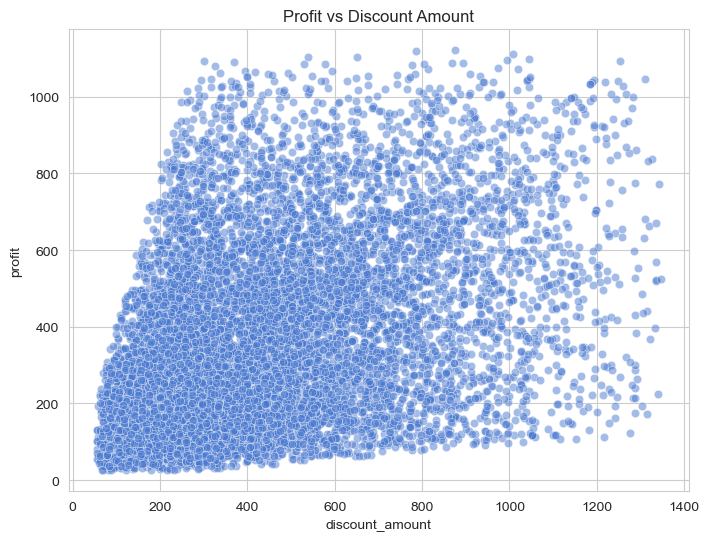

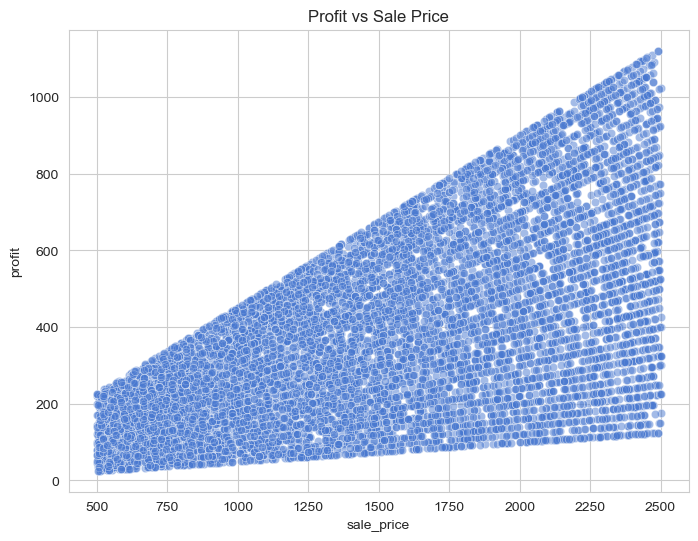

In [82]:
# scatterplot to see the relationship between the two variables.

plt.figure(figsize=(8,6))
sns.scatterplot(data=sgs, y='profit', x='discount_amount', alpha=0.5)
plt.title('Profit vs Discount Amount')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=sgs, y='profit', x='sale_price', alpha=0.5)
plt.title('Profit vs Sale Price')
plt.show()

In [83]:
#slope sales price vs profit
res = linregress(sgs['sale_price'], sgs['profit'])
print(res.slope)

0.25148372151464193


In [84]:
#slope discount amount vs profit
res = linregress(sgs['discount_amount'], sgs['profit'])
print(res.slope)

0.3539652446669731


In [85]:
#categorizing the orders using the 'category' and 'sub-category' columns
sgs_groupedby_category = sgs.groupby('category')[['sale_price','profit']].agg(sale_count = pd.NamedAgg(column='sale_price', aggfunc='count'),
                                                                        sale_total=pd.NamedAgg(column="sale_price", aggfunc="sum"),
                                                                        profit_total=pd.NamedAgg(column="profit", aggfunc="sum"))

sgs_groupedby_category['margin'] = sgs_groupedby_category['profit_total']/sgs_groupedby_category['sale_total']
sgs_groupedby_category['profit_per_order'] = sgs_groupedby_category['profit_total']/sgs_groupedby_category['sale_count']
sgs_groupedby_category

,sale_count,sale_total,profit_total,margin,profit_per_order
category,,,,,
Bakery,1413,2112281,528521.0600,0.2502,374.0418
Beverages,1400,2085313,525605.7600,0.2521,375.4327
"Eggs, Meat & Fish",1490,2267401,567357.2200,0.2502,380.7767
Food Grains,1398,2115272,529162.6400,0.2502,378.5140
Fruits & Veggies,1418,2100727,530400.3800,0.2525,374.0482
Oil & Masala,1360,2037188,497494.0100,0.2442,365.8044
Snacks,1514,2237546,568178.8500,0.2539,375.2833


In [86]:
#summary statistics of category
sgs_groupedby_category.describe()

,sale_count,sale_total,profit_total,margin,profit_per_order
count,7.0000,7.0000,7.0000,7.0000,7.0000
mean,1427.5714,2136532.5714,535245.7029,0.2505,374.8430
std,54.5767,83810.5366,24965.1829,0.0031,4.6939
min,1360.0000,2037188.0000,497494.0100,0.2442,365.8044
25%,1399.0000,2093020.0000,527063.4100,0.2502,374.0450
50%,1413.0000,2112281.0000,529162.6400,0.2502,375.2833
75%,1454.0000,2176409.0000,548878.8000,0.2523,376.9734
max,1514.0000,2267401.0000,568178.8500,0.2539,380.7767


In [87]:
# Std as percentage of mean
sgs_groupedby_category.std()/sgs_groupedby_category.mean()*100

sale_count         3.8230
sale_total         3.9227
profit_total       4.6642
margin             1.2411
profit_per_order   1.2522
dtype: float64

In [88]:
#grouped sub category
sgs_groupedby_sub_category = sgs.groupby(['category', 'sub_category'], as_index=False)[['sale_price','profit']].agg(sale_count = pd.NamedAgg(column='sale_price', aggfunc='count'),
                                                                                       sale_total=pd.NamedAgg(column="sale_price", aggfunc="sum"),
                                                                                       profit_total=pd.NamedAgg(column="profit", aggfunc="sum"))

sgs_groupedby_sub_category['margin'] = sgs_groupedby_sub_category['profit_total']/sgs_groupedby_sub_category['sale_total']
sgs_groupedby_sub_category['profit_per_order'] = sgs_groupedby_sub_category['profit_total']/sgs_groupedby_sub_category['sale_count']

sgs_groupedby_sub_category

,category,sub_category,sale_count,sale_total,profit_total,margin,profit_per_order
0,Bakery,Biscuits,459,684083,169357.6200,0.2476,368.9708
1,Bakery,Breads & Buns,502,742586,190764.9800,0.2569,380.0099
2,Bakery,Cakes,452,685612,168398.4600,0.2456,372.5630
3,Beverages,Health Drinks,719,1051439,267469.7900,0.2544,372.0025
4,Beverages,Soft Drinks,681,1033874,258135.9700,0.2497,379.0543
5,"Eggs, Meat & Fish",Chicken,348,520497,124049.8900,0.2383,356.4652
6,"Eggs, Meat & Fish",Eggs,379,575156,144669.9200,0.2515,381.7148
7,"Eggs, Meat & Fish",Fish,369,560548,147248.0100,0.2627,399.0461
8,"Eggs, Meat & Fish",Mutton,394,611200,151389.4000,0.2477,384.2371
9,Food Grains,Atta & Flour,353,534649,127861.1000,0.2391,362.2127


In [89]:
#statistics of grouped summary statistics
sgs_groupedby_sub_category.describe()

,sale_count,sale_total,profit_total,margin,profit_per_order
count,23.0000,23.0000,23.0000,23.0000,23.0000
mean,434.4783,650249.0435,162900.8661,0.2505,375.1571
std,103.5119,151781.5300,38684.7789,0.0073,10.7604
min,330.0000,498323.0000,124049.8900,0.2382,356.4652
25%,353.5000,530245.5000,132434.8500,0.2466,367.5290
50%,394.0000,611200.0000,151389.4000,0.2497,373.8217
75%,478.5000,715062.0000,176603.4800,0.2558,382.9759
max,719.0000,1051439.0000,267469.7900,0.2634,399.0461


In [90]:
# Std as percentage of mean
sgs_groupedby_sub_category.std(numeric_only=True)/sgs_groupedby_sub_category.mean(numeric_only=True)*100

sale_count         23.8244
sale_total         23.3421
profit_total       23.7474
margin              2.9001
profit_per_order    2.8682
dtype: float64

In [91]:
def get_extreme_category(df, target_col, get_max = True):
    if get_max:
        idx = df[target_col].idxmax()
        description = 'highest'
    else:
        idx = df[target_col].idxmin()
        description = 'lowest'
    sub_category = df.loc[idx, 'sub_category']
    main_category = df.loc[idx, 'category']
    print(f'The sub category with the {description} {target_col} is {sub_category} from {main_category} main category')

interest_cols =  ['sale_count', 'profit_total', 'profit_per_order']
# Getting higher end of categories
for col in interest_cols:
    get_extreme_category(sgs_groupedby_sub_category, col)
    
print("")

# Getting lower end of categories
for col in interest_cols:
    get_extreme_category(sgs_groupedby_sub_category, col, get_max=False)

The sub category with the highest sale_count is Health Drinks from Beverages main category
The sub category with the highest profit_total is Health Drinks from Beverages main category
The sub category with the highest profit_per_order is Fish from Eggs, Meat & Fish main category

The sub category with the lowest sale_count is Rice from Food Grains main category
The sub category with the lowest profit_total is Chicken from Eggs, Meat & Fish main category
The sub category with the lowest profit_per_order is Chicken from Eggs, Meat & Fish main category


In [92]:
sgs_focus = sgs[sgs.sub_category.isin(['Health Drinks','Fish','Rice','Chicken'])]
sgs_focus_summary = sgs_groupedby_sub_category[sgs_groupedby_sub_category.sub_category.isin(['Health Drinks','Fish','Rice','Chicken'])]
sgs_focus_summary

,category,sub_category,sale_count,sale_total,profit_total,margin,profit_per_order
3,Beverages,Health Drinks,719,1051439,267469.7900,0.2544,372.0025
5,"Eggs, Meat & Fish",Chicken,348,520497,124049.8900,0.2383,356.4652
7,"Eggs, Meat & Fish",Fish,369,560548,147248.0100,0.2627,399.0461
12,Food Grains,Rice,330,498323,126932.3600,0.2547,384.6435


In [93]:
#Hypothesis testing
health_drink_profit = sgs[sgs.sub_category.isin(['Health Drinks'])]['profit']
non_health_drink_profit = sgs[~sgs.sub_category.isin(['Health Drinks'])]['profit']
z_score, p_value =  ztest(health_drink_profit, non_health_drink_profit, alternative='larger')
print(z_score, p_value)

-0.3400994381020254 0.6331091775437484


In [94]:
def z_score_testing(sub_category, parameter='profit', test_side='two-sided', alpha=0.05):
    df_test = sgs[sgs.sub_category.isin([sub_category])][parameter]
    df_other = sgs[~sgs.sub_category.isin([sub_category])][parameter]
    z_score, p_value = ztest(df_test, df_other, alternative=test_side)
    print(f"For {sub_category} sub category, the z-score is {z_score}, and the p-value is {p_value}.")
    if p_value > alpha:
        print(f"The p-value is larger than alpha={alpha}, we fail to reject the null hypothesis.")
    else:
        print(f"The p-value is smaller than alpha={alpha}, we reject the null hypothesis.")

In [95]:
z_score_testing('Fish',test_side='larger')
print("")
z_score_testing('Rice',test_side='smaller')
print("")
z_score_testing('Chicken', test_side='smaller')

For Fish sub category, the z-score is 1.967258373826087, and the p-value is 0.02457671567888886.
The p-value is smaller than alpha=0.05, we reject the null hypothesis.

For Rice sub category, the z-score is 0.7474905128954339, and the p-value is 0.7726162363106105.
The p-value is larger than alpha=0.05, we fail to reject the null hypothesis.

For Chicken sub category, the z-score is -1.461669043979401, and the p-value is 0.07191596204347718.
The p-value is larger than alpha=0.05, we fail to reject the null hypothesis.
